# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [58]:
import sklearn.feature_extraction
help(sklearn.feature_extraction)


Help on package sklearn.feature_extraction in sklearn:

NAME
    sklearn.feature_extraction

DESCRIPTION
    The :mod:`sklearn.feature_extraction` module deals with feature extraction
    from raw data. It currently includes methods to extract features from text and
    images.

PACKAGE CONTENTS
    _dict_vectorizer
    _hash
    _hashing_fast
    _stop_words
    image
    setup
    tests (package)
    text

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.feature_extraction._dict_vectorizer.DictVectorizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.feature_extraction._hash.FeatureHasher(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
    sklearn.base.TransformerMixin(builtins.object)
        sklearn.feature_extraction._dict_vectorizer.DictVectorizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.feature_extraction._hash.FeatureHasher(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
processed_data = pd.read_csv('preprocessed_data.csv', nrows=50000)


In [2]:
data=processed_data.copy()
data.head()
data.shape

(50000, 9)

In [3]:
x=data.drop("project_is_approved",axis=1, inplace=False)
y=data["project_is_approved"]

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split  
x_tr, x_test, y_tr, y_test=train_test_split(x,y, test_size=0.2, stratify=y )
x_train, x_cv, y_train, y_cv=train_test_split(x_tr,y_tr, test_size=0.2, stratify=y_tr )

### Importing BOW to perform BOW on the Feature Essay

In [5]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)

#
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(ngram_range=(1,4), min_df=10)
Dictionary=vector.fit(x_train['essay'].values)
#print(vector.get_feature_names())

In [6]:
x_train_essay_bow=vector.transform(x_train['essay'].values)
x_test_essay_bow=vector.transform(x_test['essay'].values)
x_cv_essay_bow=vector.transform(x_cv['essay'].values)
print(x_train_essay_bow.shape)
print(x_test_essay_bow.shape)

(32000, 105334)
(10000, 105334)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

### Importing tfidfvectorizer and performing tfidf on essay

In [7]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector=TfidfVectorizer(ngram_range=(1,4),min_df=10)
tf_vector.fit(x_train['essay'].values)

x_train_essay_tf=tf_vector.transform(x_train['essay'].values)
x_test_essay_tf=tf_vector.transform(x_test['essay'].values)
x_cv_tf=tf_vector.transform(x_cv['essay'].values)
x_train_essay_tf.shape

(32000, 105334)

In [ ]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [8]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [9]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
#Working on School States
state_encoder=CountVectorizer(binary=True)
state_encoder.fit(x_train['school_state'].values)
school_states_train=state_encoder.transform(x_train['school_state'].values)
school_states_test=state_encoder.transform(x_test['school_state'].values)
school_states_cv=state_encoder.transform(x_cv['school_state'].values)


school_states_train.shape
school_states_test.shape

(10000, 51)

In [10]:
#Working on Teacher Prefix
prefix_encoder=CountVectorizer(binary=True)
prefix_encoder.fit(x_train['teacher_prefix'].values)
teacher_prefix_train=prefix_encoder.transform(x_train['teacher_prefix'].values)
teacher_prefix_test=prefix_encoder.transform(x_test['teacher_prefix'].values)
teacher_prefix_cv=prefix_encoder.transform(x_cv['teacher_prefix'].values)


teacher_prefix_train.shape
teacher_prefix_test.shape

prefix_encoder.get_feature_names()

['dr', 'mr', 'mrs', 'ms', 'teacher']

In [11]:
#Working on grades
grade_encoder=CountVectorizer(binary=True)
grade_encoder.fit(x_train['project_grade_category'].values)
school_grades_train=grade_encoder.transform(x_train['project_grade_category'].values)
school_grades_test=grade_encoder.transform(x_test['project_grade_category'].values)
school_grades_cv=grade_encoder.transform(x_cv['project_grade_category'].values)



school_grades_train.shape
school_grades_test.shape

grade_encoder.get_feature_names()

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']

In [12]:
#working on main categories
category_encoder=CountVectorizer(binary=True)
category_encoder.fit(x_train['clean_categories'].values)
main_category_train=category_encoder.transform(x_train['clean_categories'].values)
main_category_test=category_encoder.transform(x_test['clean_categories'].values)
main_category_cv=category_encoder.transform(x_cv['clean_categories'].values)


main_category_train.shape
main_category_test.shape

category_encoder.get_feature_names()

['appliedlearning',
 'care_hunger',
 'health_sports',
 'history_civics',
 'literacy_language',
 'math_science',
 'music_arts',
 'specialneeds',
 'warmth']

In [13]:
#working on sub categories

sub_category_encoder=CountVectorizer(binary=True)
sub_category_encoder.fit(x_train['clean_subcategories'].values)
sub_category_train=sub_category_encoder.transform(x_train['clean_subcategories'].values)
sub_category_test=sub_category_encoder.transform(x_test['clean_subcategories'].values)
sub_category_cv=sub_category_encoder.transform(x_cv['clean_subcategories'].values)


sub_category_train.shape
sub_category_test.shape

sub_category_encoder.get_feature_names()

['appliedsciences',
 'care_hunger',
 'charactereducation',
 'civics_government',
 'college_careerprep',
 'communityservice',
 'earlydevelopment',
 'economics',
 'environmentalscience',
 'esl',
 'extracurricular',
 'financialliteracy',
 'foreignlanguages',
 'gym_fitness',
 'health_lifescience',
 'health_wellness',
 'history_geography',
 'literacy',
 'literature_writing',
 'mathematics',
 'music',
 'nutritioneducation',
 'other',
 'parentinvolvement',
 'performingarts',
 'socialsciences',
 'specialneeds',
 'teamsports',
 'visualarts',
 'warmth']

In [14]:
#Performing Normalization on the numeric features
#teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

previous_submission_train=normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previous_submission_test=normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previous_submission_cv=normalizer.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [15]:
normalizer=Normalizer()
normalizer.fit(x_train['price'].values.reshape(-1,1))
price_train=normalizer.transform(x_train['price'].values.reshape(-1,1))
price_test=normalizer.transform(x_test['price'].values.reshape(-1,1))
price_cv=normalizer.transform(x_cv['price'].values.reshape(-1,1))

In [16]:
'''train_teacher_number_of_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1, 1)'''
price_train.shape

(32000, 1)

In [17]:
x_train['price'].values.shape

(32000,)

In [18]:
from scipy.sparse import hstack
x_tr=hstack((x_train_essay_bow, school_states_train, teacher_prefix_train, school_grades_train, main_category_train, sub_category_train,previous_submission_train, price_train)).tocsr()
x_te=hstack((x_test_essay_bow, school_states_test, teacher_prefix_test, school_grades_test, main_category_test, sub_category_test,previous_submission_test, price_test)).tocsr()
x_cv=hstack((x_cv_essay_bow, school_states_cv, teacher_prefix_cv, school_grades_cv, main_category_cv, sub_category_cv,previous_submission_cv, price_cv)).tocsr()

print(type(x_tr))
#csr creates rows, whereas csc creates columns

print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)
print(x_cv.shape, y_cv.shape)


#print(x_tr.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
(32000, 105435) (32000,)
(10000, 105435) (10000,)
(8000, 105435) (8000,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [19]:
y_train.values

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  6.62it/s]


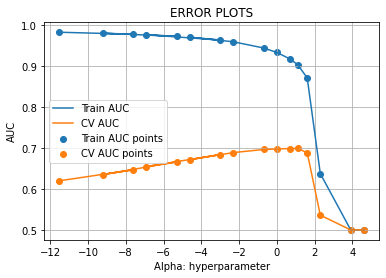

In [20]:
#Performing k_fold CV.
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import numpy as np

#[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
alpha_values=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,2,3,5,10,50,100]
train_auc=[]
cv_auc=[]
#using k-fold CV
for x in tqdm(alpha_values):
    model=MultinomialNB(alpha=x,class_prior = [0.5, 0.5])
    model.fit(x_tr, y_train)
    x_tr_prob=model.predict_proba(x_tr)[:, 1] #https://stackoverflow.com/questions/61184906/difference-between-predict-vs-predict-proba-in-scikit-learn
    x_cv_prob=model.predict_proba(x_cv)[:, 1]
    train_auc.append(roc_auc_score(y_train,x_tr_prob))
    cv_auc.append(roc_auc_score(y_cv,x_cv_prob))
    
plt.plot(np.log(alpha_values), train_auc, label='Train AUC')
plt.plot(np.log(alpha_values), cv_auc, label='CV AUC')

plt.scatter(np.log(alpha_values), train_auc, label='Train AUC points')
plt.scatter(np.log(alpha_values), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [21]:
alpha=np.exp(1.7)
print(alpha)

5.4739473917272


In [22]:
from scipy.sparse import vstack
new_x_tr=vstack((x_tr,x_cv)).tocsr()
new_y_tr=np.hstack((y_train.values, y_cv.values))
print(new_y_tr[:50])

[0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1]


In [23]:
model=MultinomialNB(alpha=5.4)
model.fit(new_x_tr, new_y_tr)
x_tr_prob=model.predict_proba(new_x_tr)[:,1]
x_test_prob=model.predict_proba(x_te)[:,1]

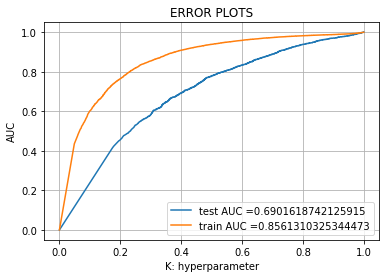

In [24]:
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, threshold_tr=roc_curve(new_y_tr,x_tr_prob)
fpr_test, tpr_test, threshold_test=roc_curve(y_test,x_test_prob)
auc_bow=auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label="test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(fpr_train, tpr_train, label="train AUC ="+str(auc(fpr_train, tpr_train)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [25]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
import numpy as np

def find_best_threshold(fpr, tpr, threshould):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", t)
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

find_best_threshold(fpr_test, tpr_test, threshold_test)

the maximum value of tpr*(1-fpr) 0.42334387537138013 for threshold 0.9999999993044639


0.9999999993044639

In [26]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

In [27]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def best_threshold(TPR, FPR, Threshold):
    scores=[]
    for x in range(len(TPR)):
        value=TPR[x]*(1-FPR[x])
        scores.append(value)
    thmax(scores)
    return

In [28]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold( tpr_train, fpr_train,threshold_tr)
print("Train confusion matrix")
print(confusion_matrix(new_y_tr, predict_with_best_t(x_tr_prob, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(x_test_prob, best_t)))

the maximum value of tpr*(1-fpr) 0.04738088330337001 for threshold 0.9999999786025457
Train confusion matrix
[[ 5064  1342]
 [ 7598 25996]]
Test confusion matrix
[[ 838  763]
 [2007 6392]]


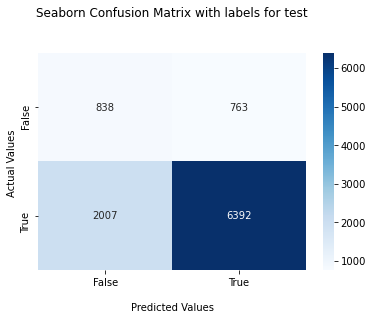

In [29]:
#reference: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
import seaborn as sns
cf_matrix=confusion_matrix(y_test, predict_with_best_t(x_test_prob, best_t))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels for test\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
positive_log_prob=model.feature_log_prob_[1]
negative_log_prob= model.feature_log_prob_[0]
positive_index=(np.argsort(positive_log_prob)[::-1])
top_features=positive_index[:20]

parent_list=[]

#x_tr=hstack((x_train_essay_bow, school_states_train, teacher_prefix_train, school_grades_train, main_category_train, sub_category_train,previous_submission_train, price_train)).tocsr()
parent_list.extend(vector.get_feature_names())
parent_list.extend(state_encoder.get_feature_names())
parent_list.extend(prefix_encoder.get_feature_names())
parent_list.extend(grade_encoder.get_feature_names())
parent_list.extend(category_encoder.get_feature_names())
parent_list.extend(sub_category_encoder.get_feature_names())
parent_list.append('submissions')
parent_list.append('price')
#print(len(parent_list))
#print(new_x_tr.shape)

for x in top_features:
    print(parent_list[x])

students
school
my
learning
classroom
the
not
they
learn
my students
help
price
many
nannan
work
we
reading
need
use
day


#### Set 2

In [31]:
from scipy.sparse import hstack
x_tr=hstack((x_train_essay_tf, school_states_train, teacher_prefix_train, school_grades_train, main_category_train, sub_category_train,previous_submission_train, price_train)).tocsr()
x_te=hstack((x_test_essay_tf, school_states_test, teacher_prefix_test, school_grades_test, main_category_test, sub_category_test,previous_submission_test, price_test)).tocsr()
x_cv=hstack((x_cv_tf, school_states_cv, teacher_prefix_cv, school_grades_cv, main_category_cv, sub_category_cv,previous_submission_cv, price_cv)).tocsr()

print(type(x_tr))
#csr creates rows, whereas csc creates columns

print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)
print(x_cv.shape, y_cv.shape)



<class 'scipy.sparse.csr.csr_matrix'>
(32000, 105435) (32000,)
(10000, 105435) (10000,)
(8000, 105435) (8000,)


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  6.58it/s]


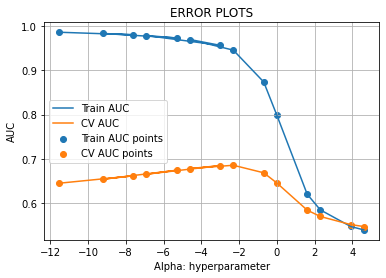

In [32]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
import random

alpha_values=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

train_auc=[]
cv_auc=[]
#using k-fold CV
for x in tqdm(alpha_values):
    model=MultinomialNB(alpha=x,class_prior = [0.5, 0.5])
    model.fit(x_tr, y_train)
    x_tr_prob=model.predict_proba(x_tr)[:, 1] #https://stackoverflow.com/questions/61184906/difference-between-predict-vs-predict-proba-in-scikit-learn
    x_cv_prob=model.predict_proba(x_cv)[:, 1]
    train_auc.append(roc_auc_score(y_train,x_tr_prob))
    cv_auc.append(roc_auc_score(y_cv,x_cv_prob))
    
plt.plot(np.log(alpha_values), train_auc, label='Train AUC')
plt.plot(np.log(alpha_values), cv_auc, label='CV AUC')

plt.scatter(np.log(alpha_values), train_auc, label='Train AUC points')
plt.scatter(np.log(alpha_values), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [33]:
np.exp(1.5)

4.4816890703380645

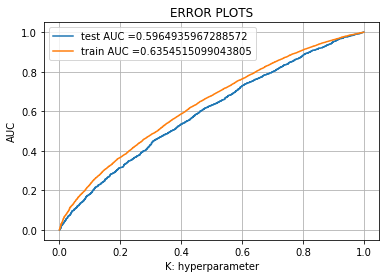

In [34]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

from scipy.sparse import vstack
new_x_tr=vstack((x_tr,x_cv)).tocsr()
new_y_tr=np.hstack((y_train.values, y_cv.values))
#print(new_y_tr[:50])

model=MultinomialNB(alpha=4.4)
model.fit(new_x_tr, new_y_tr)
x_tr_prob=model.predict_proba(new_x_tr)[:,1]
x_test_prob=model.predict_proba(x_te)[:,1]

from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, threshold_tr=roc_curve(new_y_tr,x_tr_prob)
fpr_test, tpr_test, threshold_test=roc_curve(y_test,x_test_prob)

auc_tfidf=auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, label="test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(fpr_train, tpr_train, label="train AUC ="+str(auc(fpr_train, tpr_train)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [35]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
import numpy as np

def find_best_threshold(fpr, tpr, threshould):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", t)
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

find_best_threshold(fpr_test, tpr_test, threshold_test)

the maximum value of tpr*(1-fpr) 0.3228942441989353 for threshold 0.9999935469108602


0.9999935469108602

In [36]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def best_threshold(TPR, FPR, Threshold):
    scores=[]
    for x in range(len(TPR)):
        value=TPR[x]*(1-FPR[x])
        scores.append(value)
    thmax(scores)
    return

In [37]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold( tpr_train, fpr_train,threshold_tr)
print("Train confusion matrix")
print(confusion_matrix(new_y_tr, predict_with_best_t(x_tr_prob, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(x_test_prob, best_t)))

the maximum value of tpr*(1-fpr) 0.1660924371911186 for threshold 0.9999930674868688
Train confusion matrix
[[ 3764  2642]
 [13529 20065]]
Test confusion matrix
[[ 827  774]
 [3203 5196]]


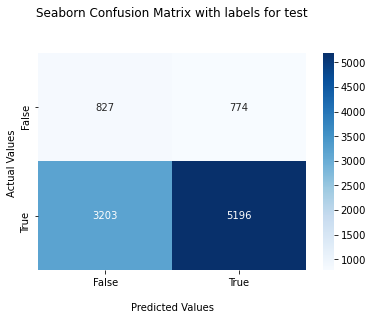

In [38]:
#reference: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
import seaborn as sns
cf_matrix=confusion_matrix(y_test, predict_with_best_t(x_test_prob, best_t))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels for test\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
positive_log_prob=model.feature_log_prob_[1]
negative_log_prob= model.feature_log_prob_[0]
positive_index=(np.argsort(positive_log_prob)[::-1])
top_features=positive_index[:20]

parent_list=[]

#x_tr=hstack((x_train_essay_bow, school_states_train, teacher_prefix_train, school_grades_train, main_category_train, sub_category_train,previous_submission_train, price_train)).tocsr()
parent_list.extend(tf_vector.get_feature_names())
parent_list.extend(state_encoder.get_feature_names())
parent_list.extend(prefix_encoder.get_feature_names())
parent_list.extend(grade_encoder.get_feature_names())
parent_list.extend(category_encoder.get_feature_names())
parent_list.extend(sub_category_encoder.get_feature_names())
parent_list.append('submissions')
parent_list.append('price')
#print(len(parent_list))
#print(new_x_tr.shape)

for x in top_features:
    print(parent_list[x])


price
submissions
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
literacy
mathematics
literature_writing
health_sports
grades_6_8
ca
health_wellness
specialneeds
specialneeds
appliedlearning
grades_9_12
mr


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [41]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Vectorizer','Model', 'Hyper Parameter','AUC']
x.add_row(['BOW','Naive Bayes','Alpha=5.4',auc_bow ])
x.add_row(['TFIDF','Naive Bayes','Alpha=4.4',auc_tfidf ])
print(x)

+------------+-------------+-----------------+--------------------+
| Vectorizer |    Model    | Hyper Parameter |        AUC         |
+------------+-------------+-----------------+--------------------+
|    BOW     | Naive Bayes |    Alpha=5.4    | 0.6901618742125915 |
|   TFIDF    | Naive Bayes |    Alpha=4.4    | 0.5964935967288572 |
+------------+-------------+-----------------+--------------------+


### Final Observations
- BOW approach seems to be more effective, when it comes to applying the Naive Bayes. 
- Because the AUC Score, of the test data sets after multiple trials of Alpha for TFIDF do not cross more than 0.59 , whereas the BOW approach has a TFIDF score of 0.69, which is a huge marginal difference.
- The hyperparameter should be chosen based upon what is important to us. For example in my current dataset, I observed that for the BOW approach with an Alpha of 3, I got a AUC score of 0.70 instead of 0.69, but it was at the cost of positive points being classified as negative points. 
- Same thing happened when I increased the Alpha value to 6 or 7, the negative points were classified as Positive points. 

#### Alpha should be selected based upon the Use Case and also the Vectorizer should be selected based on the requirement as all models are not same.